# Data Visualization Case Study

### Importing Required Packages

In [292]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

#### Importing the Data 

In [293]:
data = pd.read_csv('SalesData.csv')

## EDA

In [294]:
data.shape

(3709, 14)

In [298]:
data[data.Sales2016<0].shape,data[data.Sales2015<0].shape

((21, 14), (14, 14))

In [356]:
### Removing the Sales less than 0 

In [357]:
data = data.loc[(data.Sales2016>0 )& (data.Sales2015>0)]

In [358]:
data[data.Sales2016<0].shape,data[data.Sales2015<0].shape

((0, 16), (0, 16))

In [359]:
sales_comp =data.groupby(['Region'])[['Sales2015','Sales2016']].sum().reset_index()

In [360]:
sales_comp

,Region,Sales2015,Sales2016
0,Central,6.154319e+06,7.399447e+06
1,East,7.450712e+06,9.505044e+06
2,West,4.284256e+06,5.322026e+06


## 1) Compare Sales by region for 2016 with 2015 using bar chart 

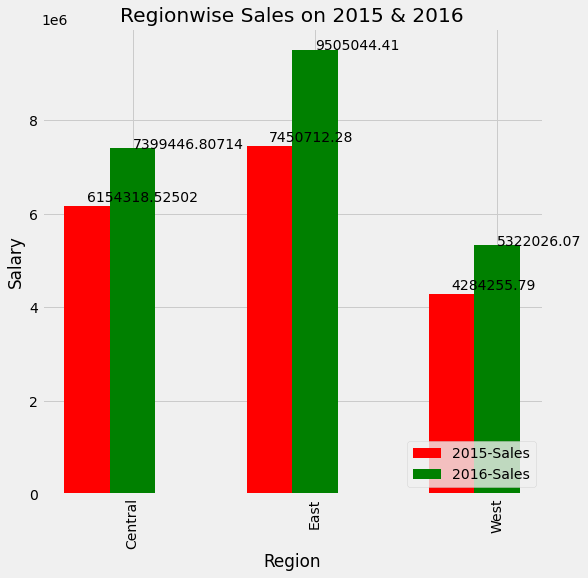

In [305]:
x_index = np.arange(len(sales_comp['Region'])) #Offset
width = 0.25 #Bar Width


plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

plt.bar(x_index-width,sales_comp['Sales2015'],color= 'r',width=width, label='2015-Sales')
plt.bar(x_index,sales_comp['Sales2016'],color='g', width= width, label='2016-Sales')


plt.xticks(ticks=x_index, labels=sales_comp.Region,rotation='vertical')
plt.xlabel('Region')
plt.ylabel('Salary')
plt.title("Regionwise Sales on 2015 & 2016")

for i,j in enumerate(zip(sales_comp['Sales2015'],sales_comp['Sales2016'])):
    plt.text(i-width,j[0]+100000,j[0],rotation='horizontal')
    plt.text(i,j[1],j[1],rotation='horizontal')



#plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

## 2. Pie charts for sales for each region in 2016

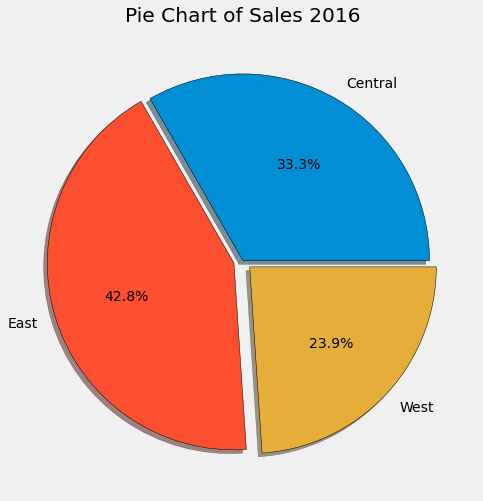

In [306]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))

explode =[0,0.05,0.05] 
plt.pie(sales_comp['Sales2016'],labels=sales_comp['Region'],wedgeprops={'edgecolor':'black'},startangle=0,
explode=explode,shadow=True,autopct='%1.1f%%')

plt.title("Pie Chart of Sales 2016")
plt.show()

## 3. Compare sales of 2015 and 2016 with Region and Tiers 

In [307]:
data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0,1.0,0.79,1.46
10,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Feb,9640.17,27316.66,3.0,10.0,1.06,1.08


In [308]:
tier_sales = data.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum()

In [310]:
df = tier_sales.reset_index()

In [366]:
df

,Region,Tier,Sales2015,Sales2016
0,Central,High,3.708320e+06,4.668517e+06
1,Central,Low,7.447856e+05,7.329996e+05
2,Central,Med,1.701213e+06,1.997930e+06
3,East,High,4.676032e+06,5.977871e+06
4,East,Low,7.660082e+05,9.046238e+05
5,East,Med,2.008672e+06,2.622549e+06
6,West,High,2.350165e+06,2.876041e+06
7,West,Low,5.196594e+05,7.487750e+05
8,West,Med,1.414432e+06,1.697210e+06


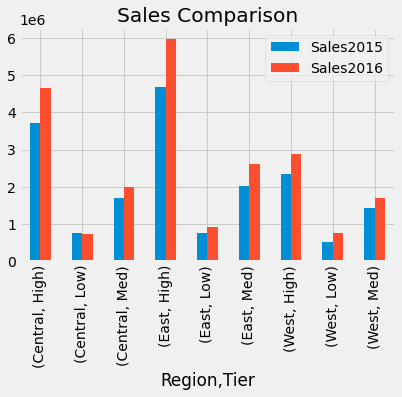

In [370]:
df.pivot_table(index=['Region','Tier'],values=['Sales2015','Sales2016'], aggfunc=np.sum).plot(kind='bar')
plt.title("Sales Comparison")
plt.text()
plt.show()

## 4. In East region, which state registered a decline in 2016 as compared to 2015? 
 


In [315]:
data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0,1.0,0.79,1.46
10,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Feb,9640.17,27316.66,3.0,10.0,1.06,1.08


In [316]:
east= data.loc[data['Region']=='East',['State','Sales2015','Sales2016']]

In [317]:
east_state_sales = east.pivot_table(index='State',values=['Sales2015','Sales2016'],aggfunc=np.sum).reset_index()

In [318]:
east_state_sales

,State,Sales2015,Sales2016
0,CT,161950.09,191397.22
1,DC,187056.42,218619.83
2,FL,1400311.28,1768757.16
3,GA,518663.32,699661.58
4,MA,336165.19,453246.49
5,MD,455864.22,587894.19
6,ME,74794.33,117426.22
7,NC,1017903.39,1248999.64
8,NH,77487.18,118632.09
9,NJ,411688.55,570138.99


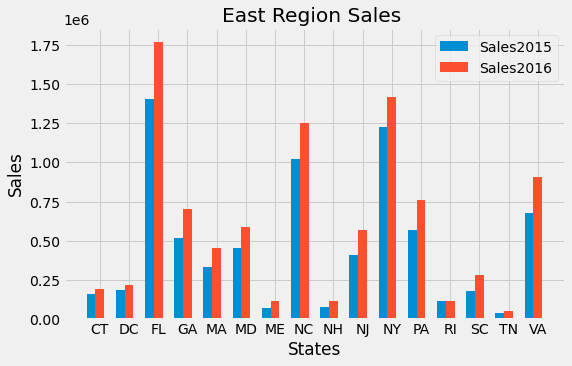

In [396]:
index= np.arange(len(east_state_sales['State']))
width=0.3


fig, ax  = plt.subplots(figsize=(8,5))

#fig.set_figure(fig=(10,10))
ax.bar(index-width, east_state_sales['Sales2015'],width= width,label='Sales2015')
ax.bar(index, east_state_sales['Sales2016'],width= width,label='Sales2016')

ax.set_xticks(ticks=index, labels=east_state_sales['State'])

ax.set_ylabel("Sales")
ax.set_xlabel("States")
ax.set_title("East Region Sales ")

ax.legend()

plt.show()



## 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?  

 
 


In [321]:
high_division= data.loc[data.Tier=='High',['Division','Units2016','Units2015']]

In [322]:
high_df = high_division.pivot_table(index='Division', values=['Units2016','Units2015'],aggfunc=np.sum).reset_index()

In [323]:
high_df.head()

,Division,Units2015,Units2016
0,BIG APPLE,126.8330,189.0000
1,CHARGERS,106.9999,142.4999
2,CONGRESSIONAL,139.8336,172.0000
3,DIAMONDBACK,118.3334,145.3333
4,EMPIRE,314.3332,376.3332


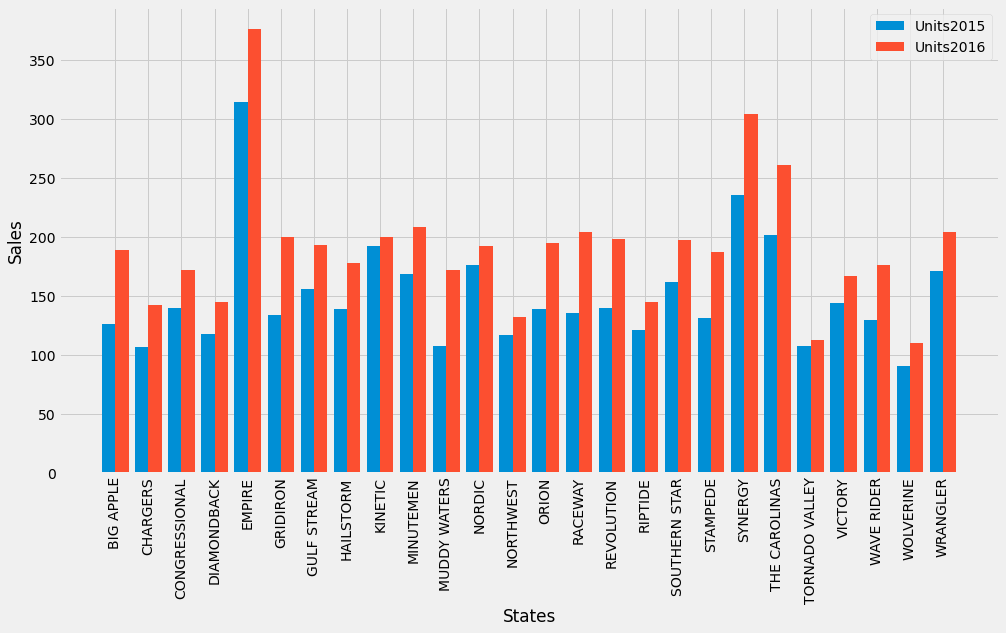

In [324]:
index= np.arange(len(high_df['Division']))
width=0.4

plt.figure(figsize=(15,8))
#fig, ax  = plt.subplots(figsize=(8,5))

#fig.set_figure(fig=(10,10))
plt.bar(index, high_df['Units2015'],width= width,label='Units2015' )
plt.bar(index+width, high_df['Units2016'],width= width ,label='Units2016')

plt.xticks(ticks=index+width/2, labels=high_df['Division'],rotation=90)
#ax.set_xticklabels(ax.get_xticks(), rotation=45,ticks=index,labels=high_df['Division'])

plt.ylabel("Sales")
plt.xlabel("States")
plt.legend()
#ax.set_title("East Region Sales ")

#ax.legend()

plt.show()

## 7.Compare Qtr wise sales in 2015 and 2016 in a bar plot 

In [325]:
data['Month_int'] = pd.to_datetime(data.Month, format='%b').dt.month

In [326]:
data.head(3)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Month_int
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,10
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,3
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99,2


In [327]:
data['Quater'] = np.where(data['Month_int']<=3,'Q1', np.where(data['Month_int']<=6 ,'Q2',
                        np.where((data['Month_int']<=9),'Q3','Q4')))

In [328]:
quater_sales = data.pivot_table(index= 'Quater',values=['Sales2015','Sales2016']).reset_index()

In [329]:
quater_sales

,Quater,Sales2015,Sales2016
0,Q1,10818.787124,13032.248320
1,Q2,10287.893975,12988.329144
2,Q3,11802.723768,14205.014868
3,Q4,11096.273046,14451.937420


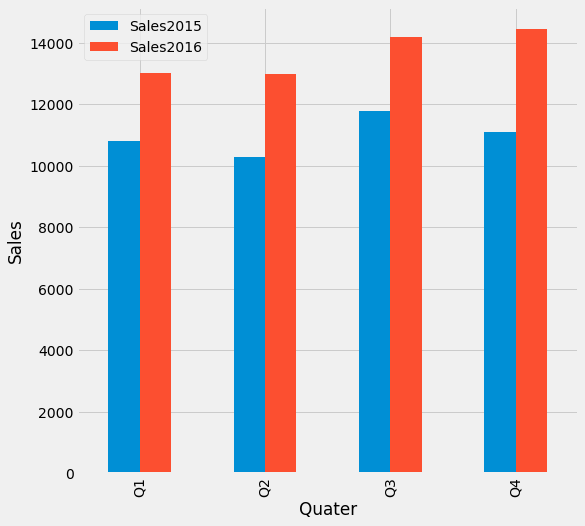

In [330]:
data.pivot_table(index= 'Quater',values=['Sales2015','Sales2016']).plot(kind='bar',figsize=(8,8))
plt.ylabel("Sales")
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart. (Draw 4 pie charts representing a Quarter for each Tier)  
 
 


In [333]:
sales_quater = data.pivot_table(index= ['Quater','Tier'], values=['Sales2016'],aggfunc=np.sum)

In [335]:
sales_quater

Sales2016
Quater Tier              
Q1     High  3.002554e+06
       Low   6.638706e+05
       Med   1.507378e+06
Q2     High  3.025757e+06
       Low   6.197998e+05
       Med   1.601728e+06
Q3     High  3.802315e+06
       Low   5.746154e+05
       Med   1.546561e+06
Q4     High  3.691804e+06
       Low   5.281126e+05
       Med   1.662022e+06

In [336]:
sq =sales_quater.reset_index()

In [351]:
q1 =sq.loc[sq.Quater=='Q1', ['Tier','Sales2016']] #removing out because it has 0 sales

In [341]:
q2 =sq.loc[sq.Quater=='Q3', ['Tier','Sales2016']]

In [345]:
q3 =sq.loc[sq.Quater=='Q3', ['Tier','Sales2016']]

In [349]:
q4 =sq.loc[sq.Quater=='Q4', ['Tier','Sales2016']]

In [398]:
fig = plt.figure(figsize=(18,10), dpi=1600)

ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(q1['Sales2016'],labels=q1['Tier'],autopct='%1.1f%%',explode=[0,0.05,0.05])
plt.title("Quater-1 Sales2016")

ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(q2['Sales2016'],labels=q2['Tier'],autopct='%1.1f%%',explode=[0,0.05,0.05])
plt.title("Quater-2 Sales2016")


#Second row first column
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.pie(q3['Sales2016'],labels=q3['Tier'],autopct='%1.1f%%',explode=[0,0.05,0.05])
plt.title("Quater-3 Sales2016")

#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
plt.pie(q4['Sales2016'],labels=q4['Tier'],autopct='%1.1f%%',explode=[0,0.05,0.05])
plt.title("Quater-4 Sales2016")
plt.show()

In [399]:
import os 

In [400]:
os.getcwd()

'g:\\Python Foundation Case Study 4 - Python Visualization Case Study'